<a href="https://colab.research.google.com/github/KamonohashiPerry/MachineLearning/blob/master/Kaggle%E3%81%A7%E5%8B%9D%E3%81%A4%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AE%E6%8A%80%E8%A1%93%E3%81%A7%E3%81%82%E3%81%92%E3%82%89%E3%82%8C%E3%81%9FEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggleで勝つデータ分析の技術に載っていたEDA
+ 平均/標準偏差/最大/最小/分位点
+ カテゴリ変数の値の種類数
+ 変数の欠損値の数
+ 変数間の相関係数

+ 棒グラフ
+ 箱ひげ、バイオリンプロット
+ 散布図
+ 折れ線グラフ
+ ヒートマップ
+ ヒストグラム
+ Q-Qプロット
+ t-SNE、UMAP

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [0]:
import pandas as pd
import pandas_profiling as pdp

In [3]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 平均/標準偏差/最大/最小/分位点
## カテゴリ変数の値の種類数
## 変数の欠損値の数
## 変数間の相関係数

In [4]:
pdp.ProfileReport(boston_df)

Number of variables,13
Number of observations,506
Total Missing (%),0.0%
Total size in memory,51.5 KiB
Average record size in memory,104.2 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


## 箱ひげ、バイオリンプロット

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

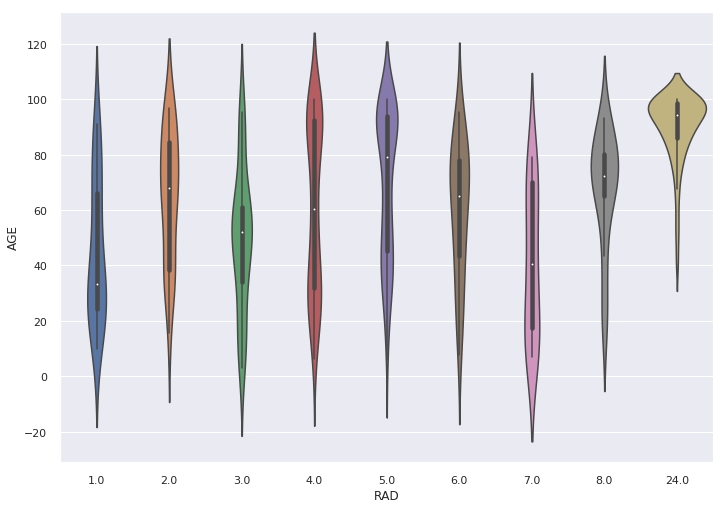

In [8]:
# RADごとにAGEのバイオリン図を作成する。
ax = sns.violinplot(x='RAD', y='AGE', data=boston_df);

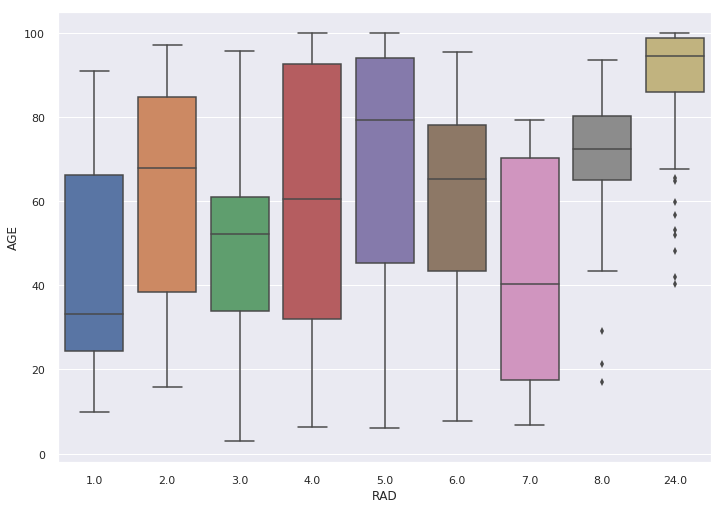

In [9]:
ax= sns.boxplot(x='RAD', y='AGE', data=boston_df);

## 散布図

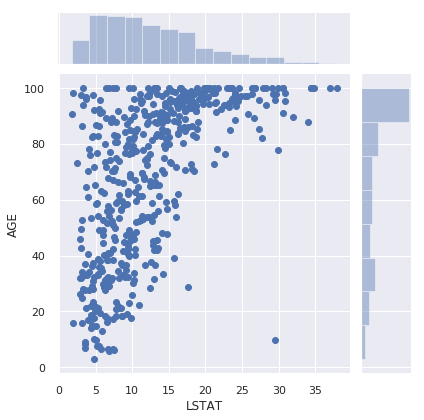

In [10]:
ax = sns.jointplot(x='LSTAT', y='AGE', data=boston_df);

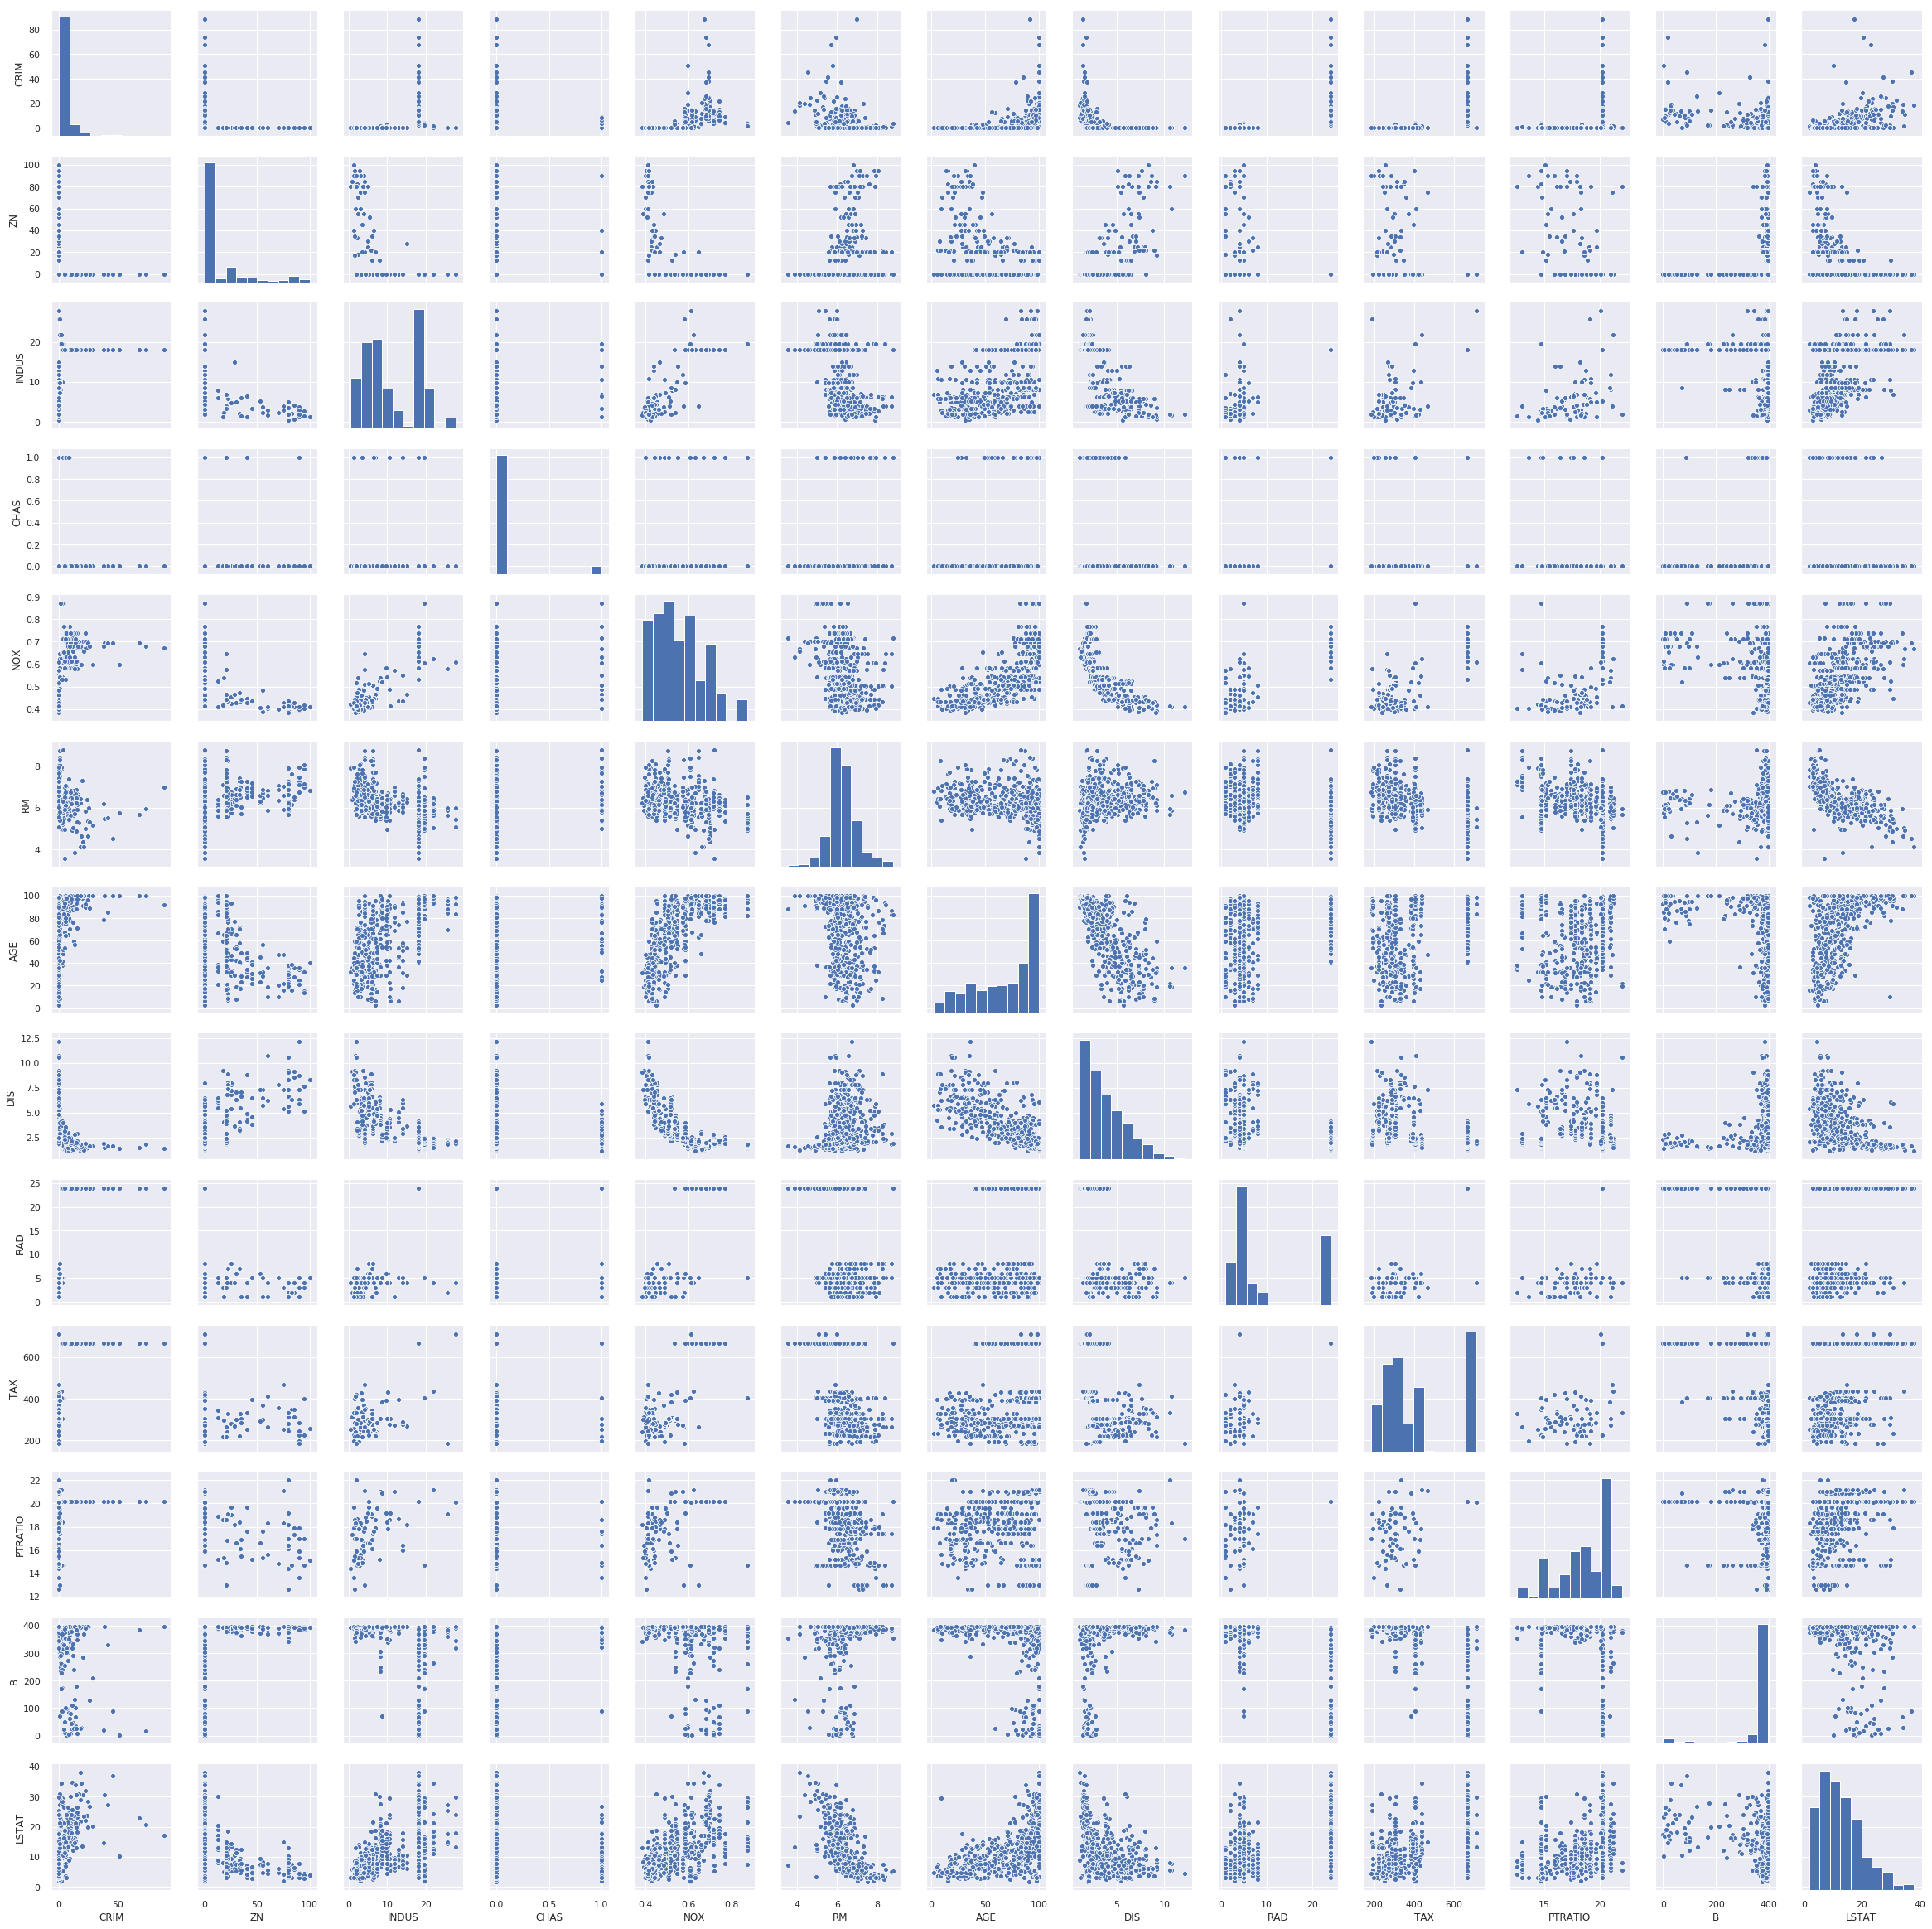

In [11]:
sns.pairplot(boston_df);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


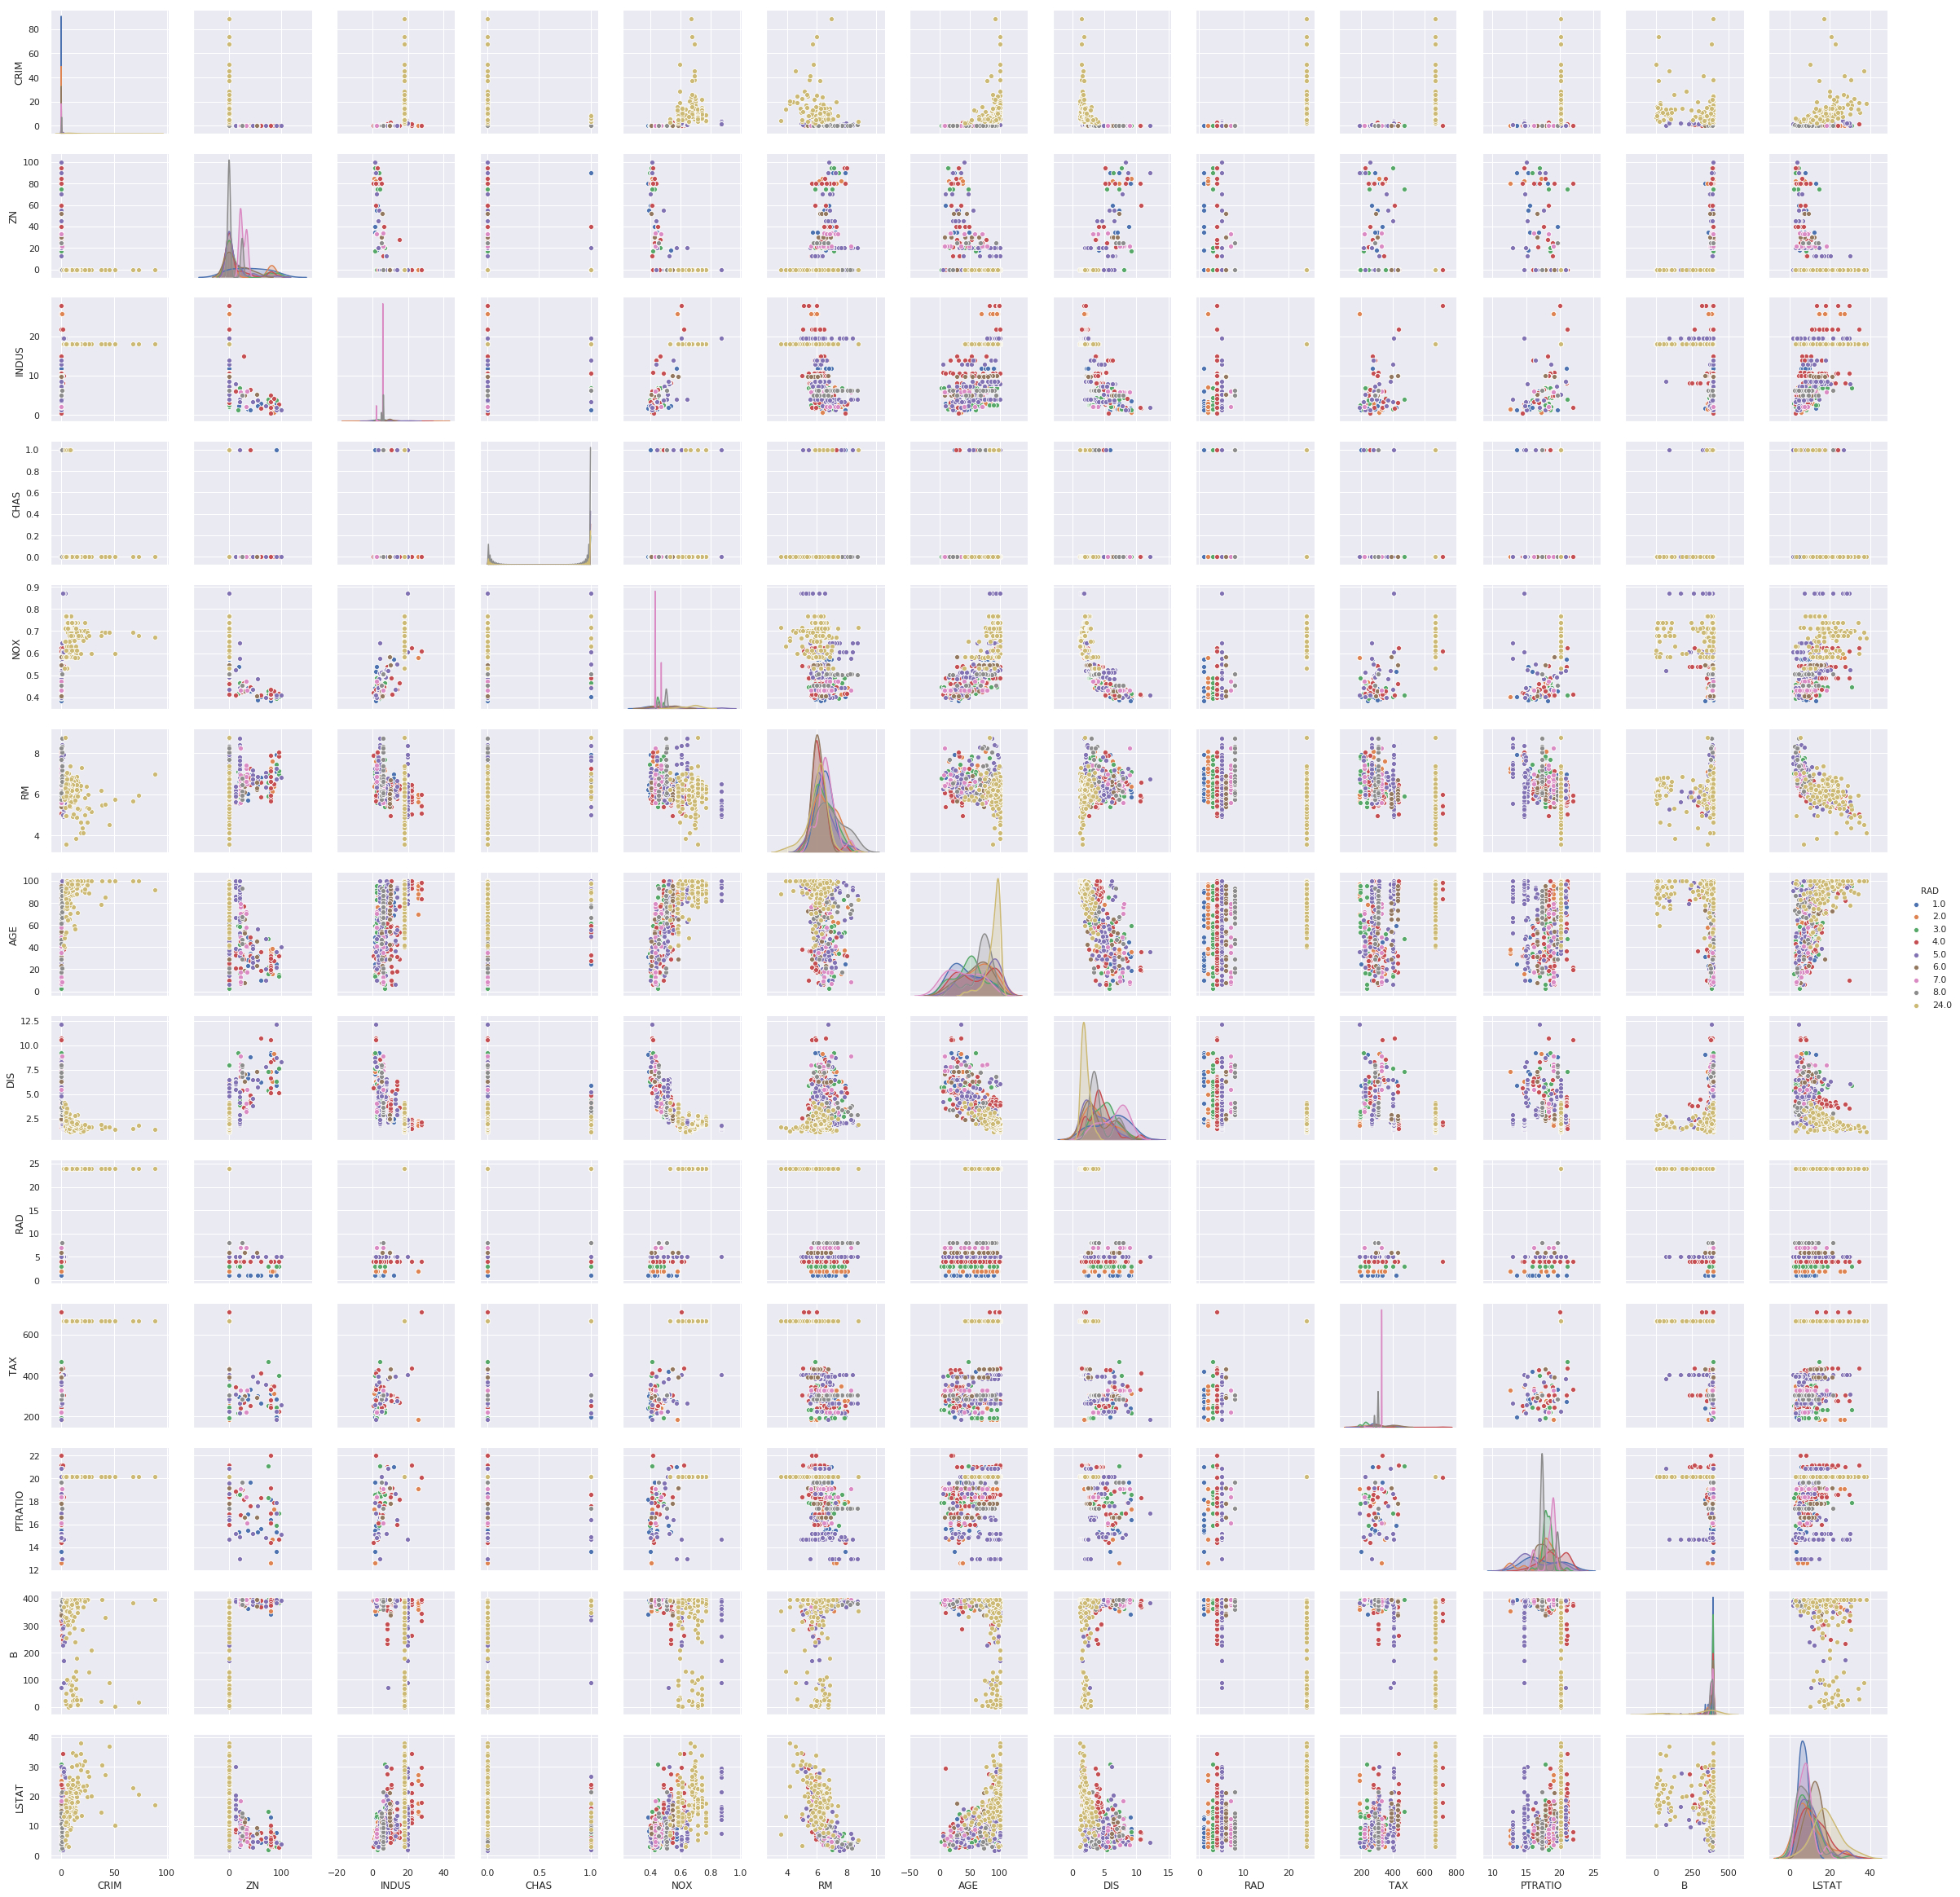

In [12]:
sns.pairplot(boston_df, hue="RAD");

## 折れ線グラフ

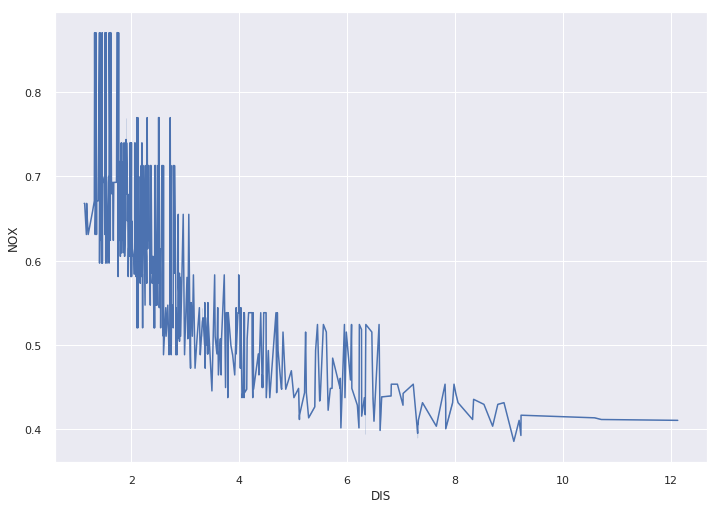

In [13]:
sns.lineplot(x='DIS', y='NOX', data=boston_df);

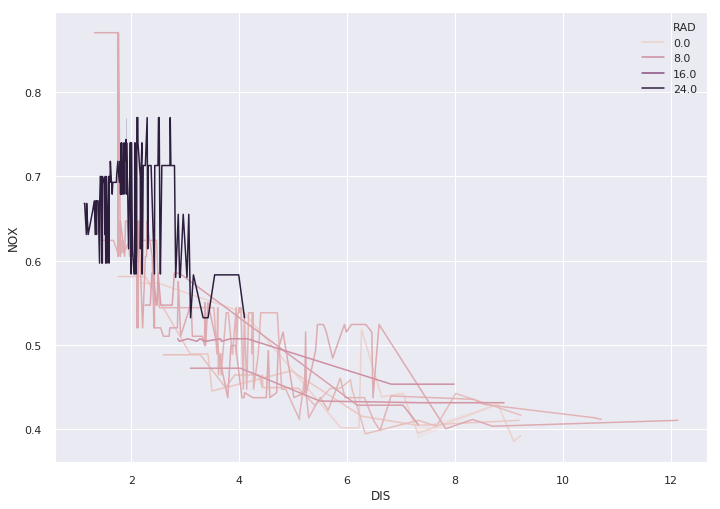

In [14]:
sns.lineplot(x='DIS', y='NOX',hue="RAD", data=boston_df);

## ヒートマップ

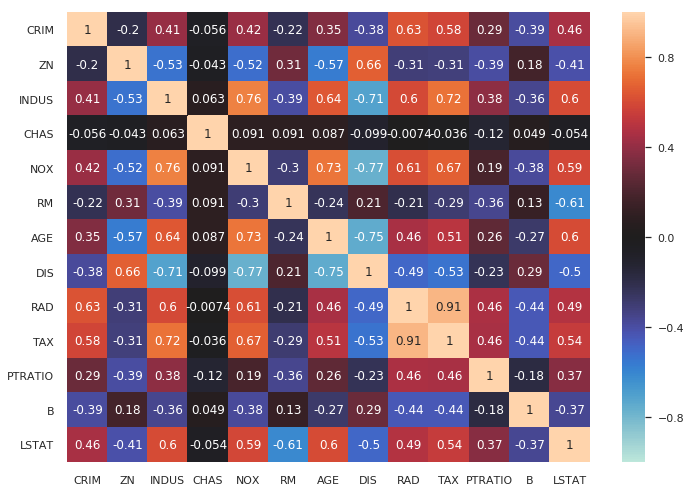

In [15]:
sns.heatmap(boston_df.corr(), vmax=1, vmin=-1, center=0,annot=True);

## Q-Qプロット
2つの確率分布を互いに対してプロットすることによって比較する統計学のグラフィカルな方法。例えば、正規分布に従っているかどうかをカジュアルに確認できる。

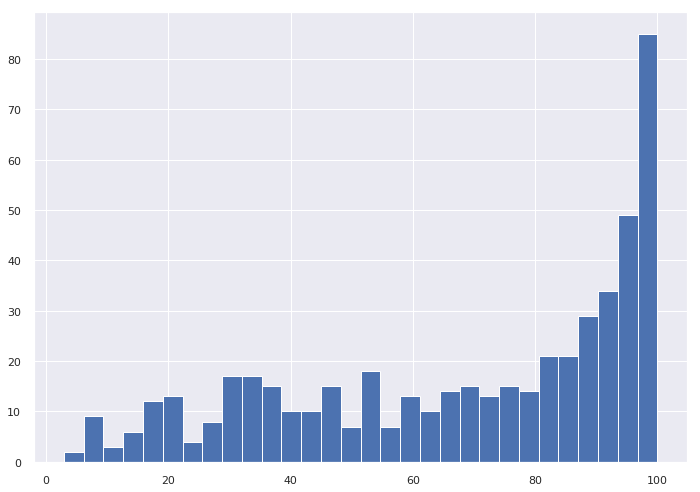

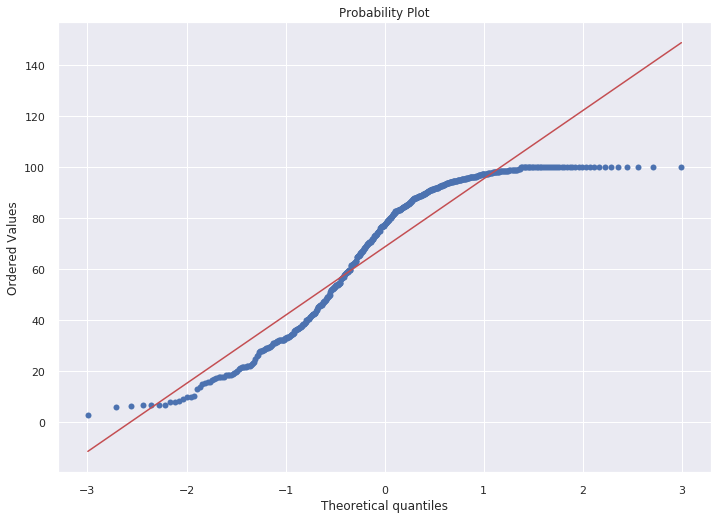

In [16]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

def qqplot(dist):
    plt.hist(dist, bins=30)
    plt.show()
    stats.probplot(dist, dist="norm", plot=plt)
    plt.show()
    

qqplot(boston_df.AGE);

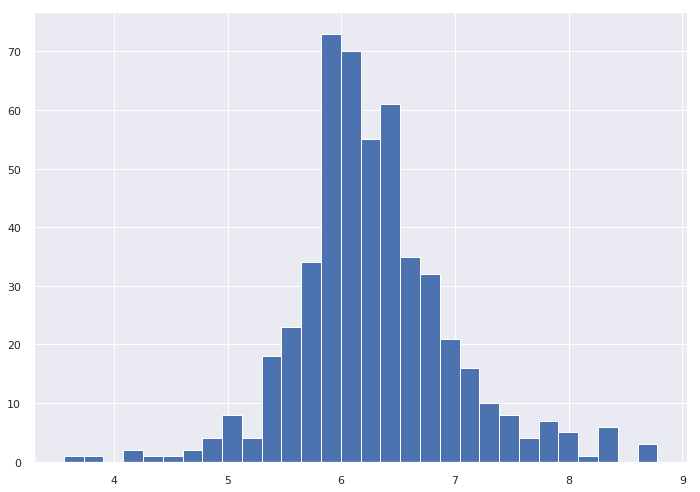

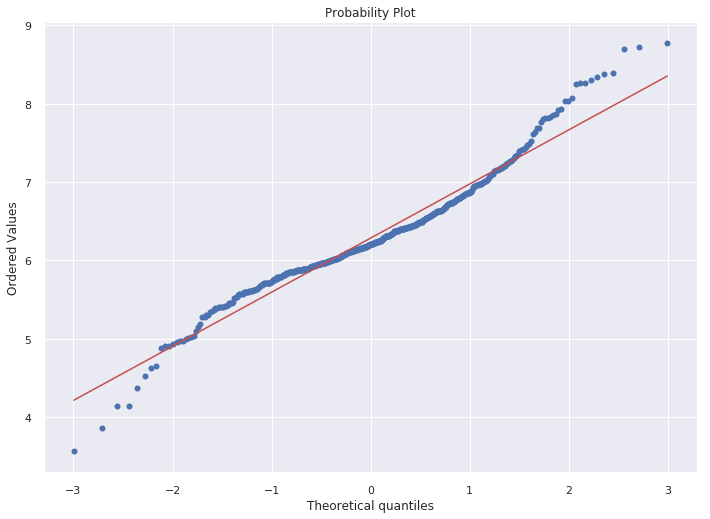

In [17]:
qqplot(boston_df.RM)

## t-SNE、UMAP
+ t-SNE：t分布型確率的近傍埋め込み法。高次元のデータ集合を2次元または3次元へ配置する際に、高い確率で類似した集合が近傍に、異なる集合が遠方となるように対応付ける。
+ UMAP：次元削減手法。t-SNEと同程度の次元削減を数倍の速さでできる。

In [0]:
from sklearn.manifold import TSNE
import time

In [0]:
y = boston_df["RAD"]
X = boston_df.drop(columns=["RAD"],axis=1)

y_items = y.unique()

Time to plot is 2.90 seconds.


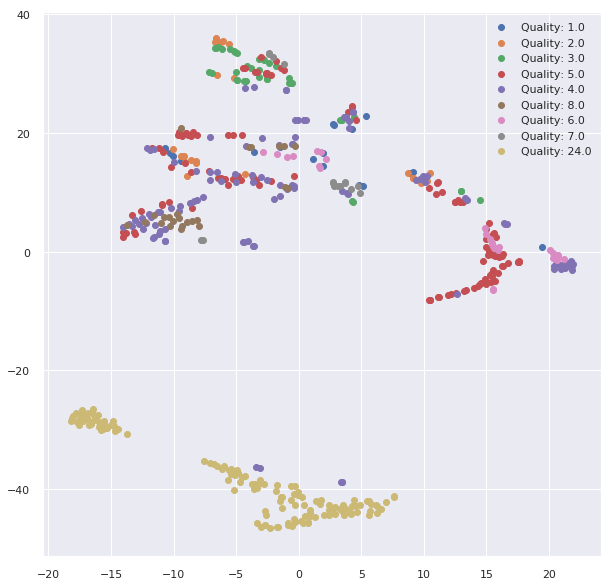

In [20]:
n_components = 2
perplexity=30 

start_time = time.time()
fig, ax = plt.subplots(figsize=(10,10))
tsne = TSNE(n_components=n_components, init='random', random_state=0, perplexity=perplexity)
Y = tsne.fit_transform(X)
for each_quality in y_items:
    c_plot_bool = y == each_quality # True/Falseのarrayを返す
    ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label="Quality: {}".format(each_quality))
end_time = time.time()
ax.legend()
print("Time to plot is {:.2f} seconds.".format(end_time - start_time))

In [0]:
import umap
import matplotlib.cm as cm

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


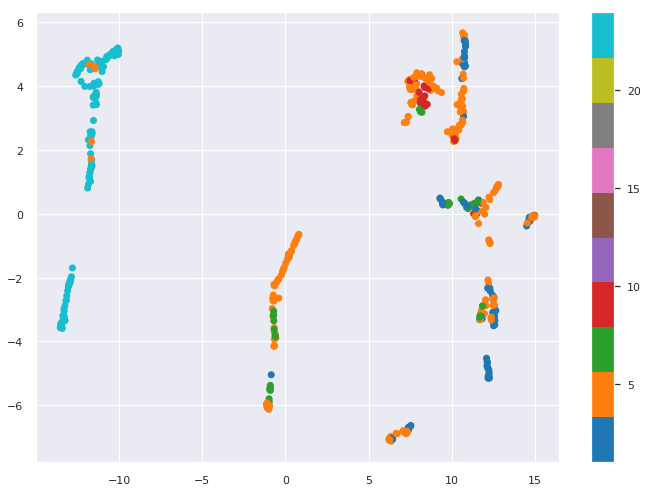

In [22]:
# UMAP
start_time = time.time()
embedding = umap.UMAP().fit_transform(X)
interval = time.time() - start_time
plt.scatter(embedding[:,0],embedding[:,1],c=y,cmap=cm.tab10)
plt.colorbar();